### Coherent Population Trapping
This notebook follows from the derived master equation for Coherent Population Trapping in Quantum and Atom Optics by Steck, Chapter 6

In [3]:
from qutip import *
import numpy as np

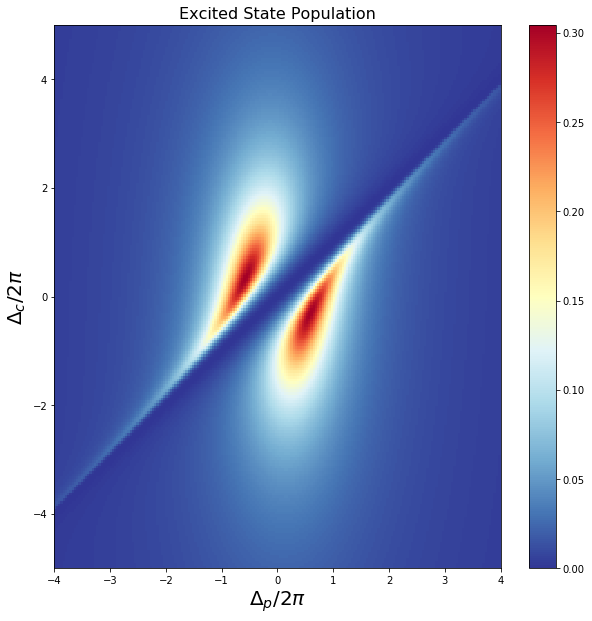

done a round


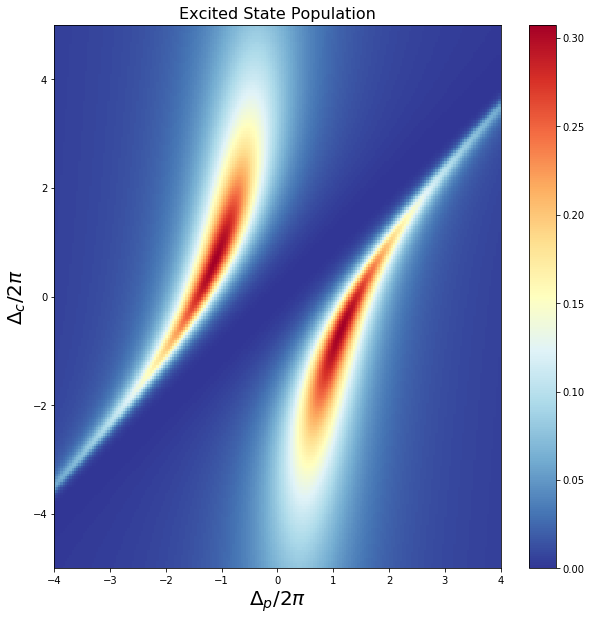

done a round


In [ ]:
'''
_____________________________________________________
|                                                    |
|              2- Pump Probe Dynamics                |
|  For a 3-Level- Superconducting circuit and cavity |
|    Written by Helen Percival and Andrew Hardy      |
|                                                    |
|          Last Updated August 3rd 2019              |
|____________________________________________________|
'''
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

def ham( delta_c, delta_p, Omega_c, Omega_p, chi, kappa,gamma):
    """ This creates the Hamiltonian and the decay operators
	Args:
	----------
	delta_c (float) : detuning of the coupling beam
	delta_p (float): detuning of the probe beam
	Omega_c (float): Rabi Frequency of coupling beam
	Omega_p (float): Rabi Frequency of probe beam
	chi (float) : dispersive shift, or cavity pull
	kappa (float) :  Decay rate of the cavity
	gamma (float) : Decay rate of the qubit
	 Returns:
	 	H (2D array, QuTiP object):  The Hamiltonian
	 	c_op_list (list) : A list of 2 QuTip objects, the decay operators
	----------
	"""
    g1 = basis(3,0)
    g2 = basis(3,1)
    e  = basis(3,2)
    # equations to simulate loss
    H = delta_c*g1*g1.dag()+ delta_p*g2*g2.dag() + \
        Omega_c/2*(g1*e.dag()+e*g1.dag()) + Omega_p/2*(g2*e.dag()+e*g2.dag())
    p_1 = np.sqrt(kappa)*g1*e.dag()
    p_2 = np.sqrt(gamma)*g2*e.dag()
    return H, [p_1,p_2]
# define fitting parameters
N = 200
M = 200
p_tot = 3
c_tot = 3
# define excitation population
e_pop = np.zeros([M,N])
chi = -1.05*2*np.pi  # Dispersive shift in cavity resonance frequency due to qubit state
delta_p = np.linspace(-8*np.pi,8*np.pi,N+1)  # Probe frequency detuning
delta_c = np.linspace(-10*np.pi,10*np.pi,M+1)  # Coupler frequency detuning
kappa = 0.25*2*np.pi       # 2.9                   # Decay rate of the cavity
gamma = 0.0625*2*np.pi     # 0.04                    # Decay rate of the qubit\
g1 = basis(3,0)
g2 = basis(3,1)
e  = basis(3,2)
expector = e*e.dag()
for p in range(1,p_tot):
    for c in range(1,c_tot):
        Omega_p = 0.25*p*2*np.pi                        # Probe Rabi drive frequency
        Omega_c = 1.4*c*2*np.pi                        # Coupler Rabi drive frequency
        for i in range(N):
            for j in range(M):
                H, c_op_list = ham(delta_c[j], delta_p[i], Omega_c, Omega_p, chi, kappa, gamma)
                result = steadystate(H, c_op_list)
                e_pop[j,i] = expect(expector, result)
# plotting functionality
        fig, ax = plt.subplots( figsize = (10 ,10))
        #np.savetxt('detuning_Ap5_Oc400_test.txt' ,e_pop, fmt= '%f' , delimiter= ',' )
        plot = ax.pcolor(delta_p/(2*np.pi),delta_c/(2*np.pi), e_pop, edgecolors= 'none' )
        plot.set_cmap ('RdYlBu_r')
        ax.set_ylabel(r'$\Delta_{c}/2\pi$', fontsize=20)
        ax.set_xlabel(r'$\Delta_{p}/2\pi$', fontsize=20)
        ax.axis('tight')
        ax.set_title('Excited State Population' , fontsize=16)
        plt.colorbar(plot)
        plt.savefig('test_vadiraj_ATS.png')
        plt.show()
        print('done a round')
